In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
%pylab inline

import os

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#Import the homicides data


df1 = pd.read_csv("https://raw.githubusercontent.com/srikanth261/PUI2017_sn2495/master/"+
"HW5_sn2495/world_firearms_murders.csv")

df1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [3]:
# clean up
df1 = df1[['Country/Territory', 'Number of homicides by firearm', 'Average total all civilian firearms']]

df1.columns = ['country', 'gun_homicides', 'avg_tot_firearms']

df1.head()

,country,gun_homicides,avg_tot_firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [4]:
# get the guns and num of mass shootings data
df2 = pd.read_csv("https://raw.githubusercontent.com/srikanth261/PUI2017_sn2495/master/HW5_sn2495/data_pvlfi.csv")

df2.columns = ['country', 'guns_per_hundred', 'num_of_mass_shootings']

df2.head()

,country,guns_per_hundred,num_of_mass_shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [5]:
# get the population data
df3 = pd.read_csv("https://raw.githubusercontent.com/srikanth261/"+
                  "PUI2017_sn2495/master/HW5_sn2495/pop_total.csv", skiprows=[0,1,2,3])

df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [6]:
# clean up
df3 = df3[['Country Name', '2012']]

df3.columns = ['country', 'population']

df3.head()

,country,population
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [7]:
# get the gdp data
df4 = pd.read_csv("https://raw.githubusercontent.com/" +
                  "srikanth261/PUI2017_sn2495/master/HW5_sn2495/gdp_data.csv", skiprows = [0,1,2,3])

df4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN,NaN


In [8]:
# clean up

df4 = df4[['Country Name', '2012']]

df4.columns = ['country', 'gdp']

df4.head()

,country,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [9]:
df = df1.merge(df2, on='country')

df = df.merge(df3, on = 'country')

df = df.merge(df4, on = 'country')

df

,country,gun_homicides,avg_tot_firearms,guns_per_hundred,num_of_mass_shootings,population,gdp
0,Australia,30.0,3050000.0,15.0,4,22728254.0,1.538194e+12
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.074516e+11
2,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12
3,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11
4,Finland,24.0,2400000.0,45.3,2,5413971.0,2.567065e+11
5,France,35.0,19000000.0,31.2,6,65659790.0,2.681416e+12
6,Germany,158.0,25000000.0,30.3,7,80425823.0,3.543984e+12
7,Greece,29.0,2500000.0,22.5,0,11045011.0,2.456707e+11
8,Hungary,7.0,560000.0,5.5,0,9920362.0,1.273211e+11
9,Iceland,0.0,90000.0,30.3,0,320716.0,1.421858e+10


In [10]:
df.columns

Index([u'country', u'gun_homicides', u'avg_tot_firearms', u'guns_per_hundred',
       u'num_of_mass_shootings', u'population', u'gdp'],
      dtype='object')

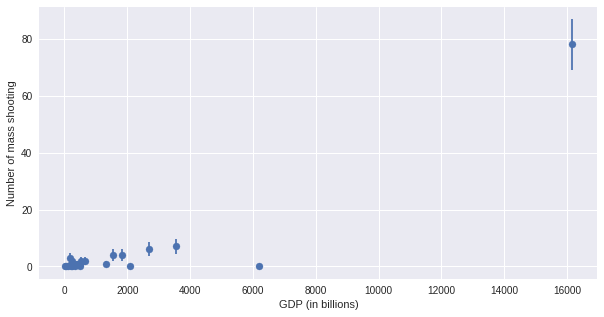

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [11]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['num_of_mass_shootings'])
ax.errorbar(df.gdp / 1e9, df['num_of_mass_shootings'], 
            yerr = np.sqrt(df['num_of_mass_shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

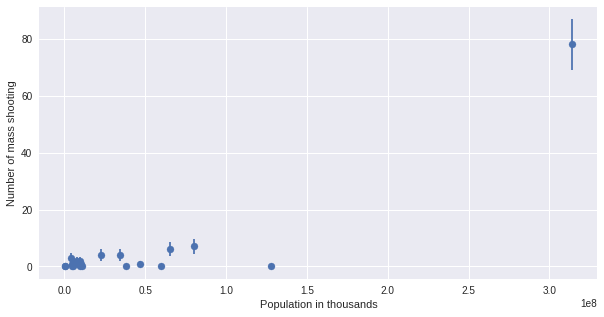

Number of mass shooting vs populations, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest poplutaion and the highest number of mass shootings


In [12]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.population, df['num_of_mass_shootings'])
ax.errorbar(df.population, df['num_of_mass_shootings'], 
            yerr = np.sqrt(df['num_of_mass_shootings'] * 1.0), fmt = '.')
ax.set_xlabel("Population in thousands")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs populations, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest poplutaion and the highest number of mass shootings")

In [13]:
df['shootingspp'] = df["num_of_mass_shootings"] / df['population'] * 1e3

In [14]:
df.head()

,country,gun_homicides,avg_tot_firearms,guns_per_hundred,num_of_mass_shootings,population,gdp,shootingspp
0,Australia,30.0,3050000.0,15.0,4,22728254.0,1.538194e+12,0.000176
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.074516e+11,0.000119
2,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12,0.000115
3,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.000000
4,Finland,24.0,2400000.0,45.3,2,5413971.0,2.567065e+11,0.000369


Number of civilian firearms vs population, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest population and the highest number of civilian firearms


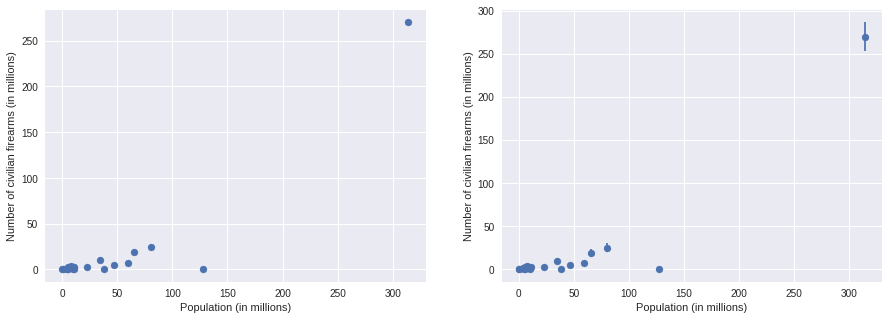

In [15]:
fig = pl.figure(figsize=(15,5)) 

#Without Error bar
ax1 = fig.add_subplot(121)
scatter = ax1.scatter((df['population'] / 1e6), (df['avg_tot_firearms'] / 1e6))
ax1.set_xlabel("Population (in millions)")
ax1.set_ylabel("Number of civilian firearms (in millions)")
ax1.set_ylim()


#With Error bar
ax2 = fig.add_subplot(122)
scatter = ax2.scatter((df['population'] / 1e6), (df['avg_tot_firearms'] / 1e6))
ax2.errorbar((df['population'] / 1e6), (df['avg_tot_firearms'] / 1e6),
            yerr = np.sqrt(df['avg_tot_firearms'] /1e6), fmt = '.')
ax2.set_xlabel("Population (in millions)")
ax2.set_ylabel("Number of civilian firearms (in millions)")
ax2.set_ylim()


print ("Number of civilian firearms vs population, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest population and the highest number of civilian firearms")

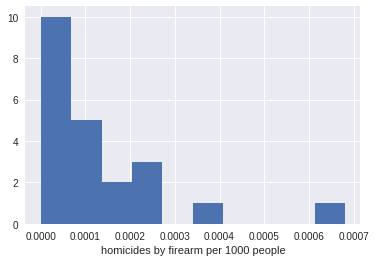

In [16]:
fig, ax = plt.subplots()
ax.hist(df['num_of_mass_shootings'] / df['population'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

Number of civilian firearms vs population, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of homicides by firearms


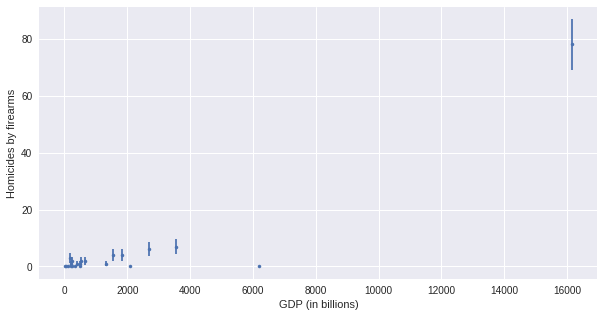

In [17]:
fig = pl.figure(figsize=(10,5)) 


#With Error bar
ax2 = fig.add_subplot(111)
scatter = ax1.scatter(df['gdp']/1e9,df['num_of_mass_shootings'])
ax2.errorbar((df['gdp']/1e9), df['num_of_mass_shootings'],
            yerr = np.sqrt(df['num_of_mass_shootings']), fmt = '.')
ax2.set_xlabel("GDP (in billions)")
ax2.set_ylabel("Homicides by firearms")
ax2.set_ylim()


print ("Number of civilian firearms vs population, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of homicides by firearms")

In [18]:
df.columns

Index([u'country', u'gun_homicides', u'avg_tot_firearms', u'guns_per_hundred',
       u'num_of_mass_shootings', u'population', u'gdp', u'shootingspp'],
      dtype='object')

Number of homicides by firearm vs number of civilian firearms without and with error, errors represent Poisson statistics.
The datapoint in a diff color to the top right of the plot is the USA, which has both the highest number of homicides by firearm and the highest number of civilian firearms


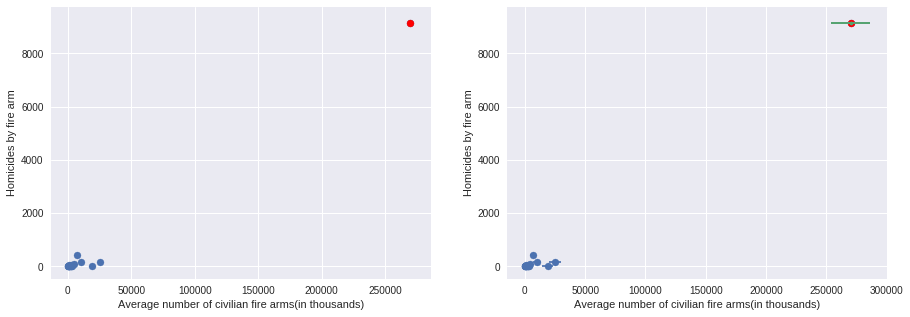

In [19]:
fig = pl.figure(figsize=(15,5)) 

#Without Error bar
ax1 = fig.add_subplot(121)
scatter = ax1.scatter((df['avg_tot_firearms']/1e3 ), (df['gun_homicides']))
scatter1 = ax1.scatter(((df['avg_tot_firearms'][21])/1e3 ), ((df['gun_homicides'][21])), c = 'r')
ax1.set_xlabel("Average number of civilian fire arms(in thousands)")
ax1.set_ylabel("Homicides by fire arm")
ax1.set_ylim()


#With Error bar
ax2 = fig.add_subplot(122)
scatter = ax2.scatter((df['avg_tot_firearms']/1e3 ), (df['gun_homicides']))
scatter2 = ax2.scatter(((df['avg_tot_firearms'][21])/1e3 ), ((df['gun_homicides'][21])), c = 'r')
ax2.errorbar((df['avg_tot_firearms'] / 1e3), (df['gun_homicides']),
            xerr = np.sqrt(df['avg_tot_firearms']), fmt = '.')
ax2.errorbar((df['avg_tot_firearms'][21] / 1e3), (df['gun_homicides'][21]),
            xerr = np.sqrt(df['avg_tot_firearms'][21]), fmt = '.')
ax2.set_xlabel("Average number of civilian fire arms(in thousands)")
ax2.set_ylabel("Homicides by fire arm")
ax2.set_ylim()


print ("Number of homicides by firearm vs number of civilian firearms without and with error, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint in a diff color to the top right of the plot is the USA, " + 
       "which has both the highest number of homicides by firearm and the highest number of civilian firearms")

Number of mass shootings vs number of civilian firearms without and with error, errors represent Poisson statistics.
The datapoint in a diff color to the top right of the plot is the USA, which has both the highest number mass shootings and the highest number of civilian firearms


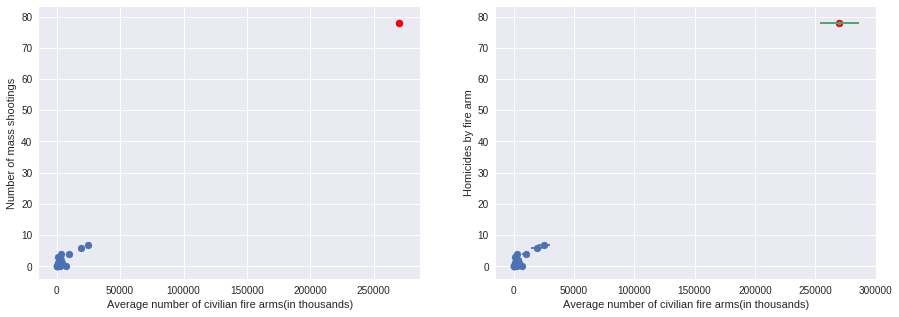

In [20]:
fig = pl.figure(figsize=(15,5)) 

#Without Error bar
ax1 = fig.add_subplot(121)
scatter = ax1.scatter((df['avg_tot_firearms']/1e3 ), (df['num_of_mass_shootings']))
scatter1 = ax1.scatter(((df['avg_tot_firearms'][21])/1e3 ), ((df['num_of_mass_shootings'][21])), c = 'r')
ax1.set_xlabel("Average number of civilian fire arms(in thousands)")
ax1.set_ylabel("Number of mass shootings")
ax1.set_ylim()


#With Error bar
ax2 = fig.add_subplot(122)
scatter = ax2.scatter((df['avg_tot_firearms']/1e3 ), (df['num_of_mass_shootings']))
scatter2 = ax2.scatter(((df['avg_tot_firearms'][21])/1e3 ), ((df['num_of_mass_shootings'][21])), c = 'r')
ax2.errorbar((df['avg_tot_firearms'] / 1e3), (df['num_of_mass_shootings']),
            xerr = np.sqrt(df['avg_tot_firearms']), fmt = '.')
ax2.errorbar((df['avg_tot_firearms'][21] / 1e3), (df['num_of_mass_shootings'][21]),
            xerr = np.sqrt(df['avg_tot_firearms'][21]), fmt = '.')
ax2.set_xlabel("Average number of civilian fire arms(in thousands)")
ax2.set_ylabel("Homicides by fire arm")
ax2.set_ylim()


print ("Number of mass shootings vs number of civilian firearms without and with error, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint in a diff color to the top right of the plot is the USA, " + 
       "which has both the highest number mass shootings and the highest number of civilian firearms")

In [21]:
df.columns

Index([u'country', u'gun_homicides', u'avg_tot_firearms', u'guns_per_hundred',
       u'num_of_mass_shootings', u'population', u'gdp', u'shootingspp'],
      dtype='object')

In [22]:
x = df['avg_tot_firearms'] / df['population'] *10
y = df['num_of_mass_shootings'] / df['population'] *1e7

y_err = np.abs(y)**0.5

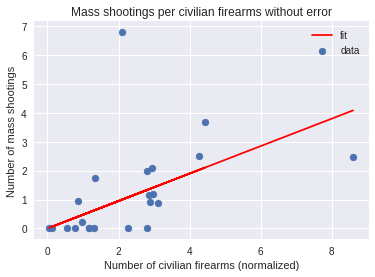

In [23]:
rm = sm.OLS(y,x).fit()

pl.scatter(x,y, label = 'data')
pl.plot(x,rm.fittedvalues, label = 'fit', color = 'red')
pl.legend(loc = 'best')
pl.xlabel("Number of civilian firearms (normalized)")
pl.ylabel("Number of mass shootings")
pl.title("Mass shootings per civilian firearms without error")

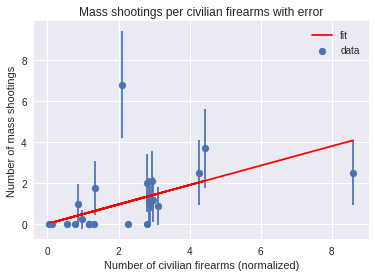

In [24]:
pl.scatter(x,y, label = 'data')
pl.errorbar(x,y,yerr= y_err, fmt='.')
pl.plot(x,rm.fittedvalues, label = 'fit', color = 'red')
pl.legend(loc = 'best')
pl.xlabel("Number of civilian firearms (normalized)")
pl.ylabel("Number of mass shootings")
pl.title("Mass shootings per civilian firearms with error")

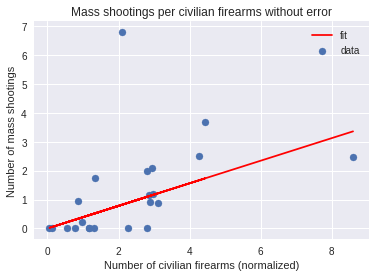

In [25]:
rm_w = sm.WLS(y, x, weights = 1/(y_err+1) ).fit()

pl.scatter(x,y, label = 'data')
pl.plot(x,rm_w.fittedvalues, label = 'fit', color = 'red')
pl.legend(loc = 'best')
pl.xlabel("Number of civilian firearms (normalized)")
pl.ylabel("Number of mass shootings")
pl.title("Mass shootings per civilian firearms without error")

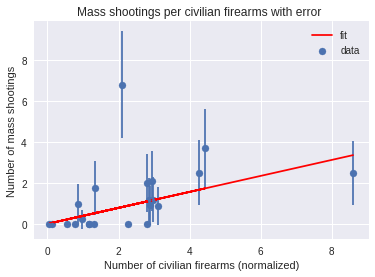

In [26]:
pl.scatter(x,y, label = 'data')
pl.errorbar(x,y,yerr= y_err, fmt='.')
pl.plot(x,rm_w.fittedvalues, label = 'fit', color = 'red')
pl.legend(loc = 'best')
pl.xlabel("Number of civilian firearms (normalized)")
pl.ylabel("Number of mass shootings")
pl.title("Mass shootings per civilian firearms with error ")

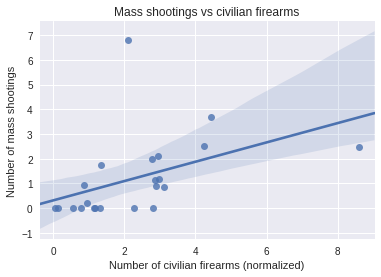

In [27]:
sns.regplot(x, y)
pl.xlabel("Number of civilian firearms (normalized)")
pl.ylabel("Number of mass shootings")
pl.title("Mass shootings vs civilian firearms")

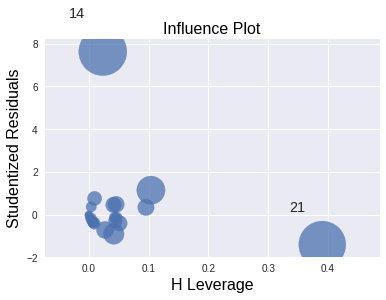

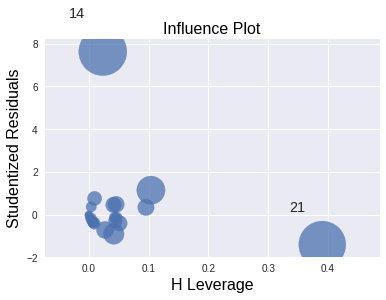

In [28]:
sm.graphics.influence_plot(rm, alpha  = 0.05, criterion="cooks")